# KNN - SVM 

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Read dataset

In [ ]:
https://archive.ics.uci.edu/ml/datasets/mushroom

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [ ]:
mushrooms = pd.read_csv("./mushrooms.csv")

In [ ]:
# first 5 rows of dataset
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# How to replace value of cap-color column
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 


In [ ]:
color_char = {
    'brown':'n',
'buff':'b',
'cinnamon':'c',
'gray':'g',
'green':'r',
'pink':'p',
'purple':'u',
'red':'e',
'white':'w',
'yellow':'y'
}

In [ ]:
char_color = dict((v, k) for (k, v) in color_char.items())

In [ ]:
char_color

{'n': 'brown',
 'b': 'buff',
 'c': 'cinnamon',
 'g': 'gray',
 'r': 'green',
 'p': 'pink',
 'u': 'purple',
 'e': 'red',
 'w': 'white',
 'y': 'yellow'}

In [ ]:
def convert_color(char):
    return char_color[char]

convert_color('b')

'buff'

In [ ]:
# mushrooms['cap-color'].apply(convert_color)
mushrooms['cap-color'] = mushrooms['cap-color'].replace(char_color)

In [ ]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,brown,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,yellow,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,white,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,white,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,gray,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


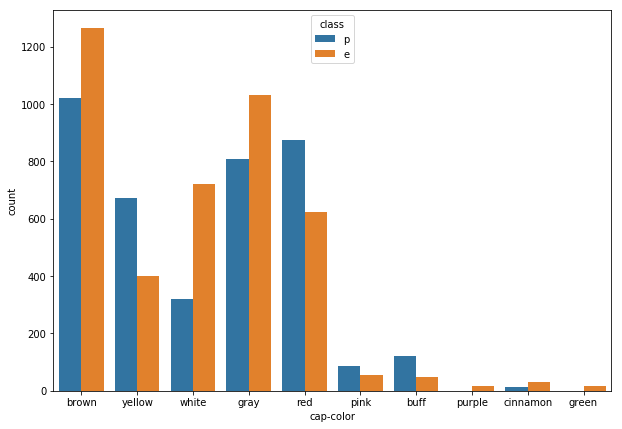

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='cap-color', data=mushrooms, hue='class');

In [ ]:
odor_dict = {
'almond':'a',
'anise':'l',
'creosote':'c',
'fishy':'y',
'foul':'f',
'musty':'m',
'none':'n',
'pungent':'p',
'spicy':'s'
}

In [ ]:
odor_dict_rev = dict((v, k) for (k, v) in odor_dict.items())

In [ ]:
odor_dict_rev

{'a': 'almond',
 'l': 'anise',
 'c': 'creosote',
 'y': 'fishy',
 'f': 'foul',
 'm': 'musty',
 'n': 'none',
 'p': 'pungent',
 's': 'spicy'}

In [ ]:
mushrooms['odor'] = mushrooms['odor'].replace(odor_dict_rev)

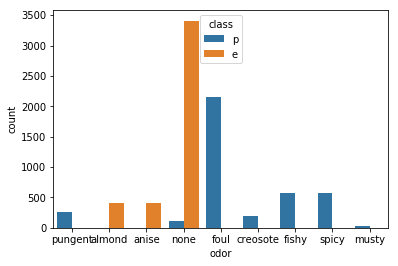

In [ ]:
sns.countplot(x='odor', data=mushrooms, hue='class')

In [ ]:
## Define Features and Label
# X = mushrooms.drop(columns=['class'])
# X = mushrooms[['odor']]
X = mushrooms[['cap-color', 'odor']]
y = mushrooms['class']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoder.fit_transform(X).toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
encoder.get_feature_names()

array(['x0_brown', 'x0_buff', 'x0_cinnamon', 'x0_gray', 'x0_green',
       'x0_pink', 'x0_purple', 'x0_red', 'x0_white', 'x0_yellow',
       'x1_almond', 'x1_anise', 'x1_creosote', 'x1_fishy', 'x1_foul',
       'x1_musty', 'x1_none', 'x1_pungent', 'x1_spicy'], dtype=object)

## Split data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
## Time to create pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define steps of Pipeline
steps = []
steps.append(['encoder', OneHotEncoder()])
steps.append(['estimator', SVC()])

pipe = Pipeline(steps=steps)
pipe

Pipeline(memory=None,
     steps=[['encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)], ['estimator', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)]])

In [ ]:
steps

[['encoder', OneHotEncoder(categorical_features=None, categories=None,
         dtype=<class 'numpy.float64'>, handle_unknown='error',
         n_values=None, sparse=True)],
 ['estimator', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)]]

In [ ]:
sample_list = []
sample_list

[]

In [ ]:
sample_list.append('a')
sample_list

['a']

In [ ]:
sample_list.append('b')
sample_list

['a', 'b']

In [ ]:
pipe.fit(X_train, y_train)

/home/dks/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)), ['estimator', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           e       0.97      1.00      0.98      1274
           p       1.00      0.96      0.98      1164

   micro avg       0.98      0.98      0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [ ]:
## replace estimator with KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Let's create Pipeline
steps = []›
steps.append(['Encoder', OneHotEncoder()])
steps.append(['Estimator', KNeighborsClassifier()])
# your code here
pipe_knn = Pipeline(steps=steps)

In [ ]:
# evaluate model
pipe_knn.fit(X_train, y_train)
print(classification_report(y_test, pipe_knn.predict(X_test)))

              precision    recall  f1-score   support

           e       0.99      0.98      0.98      1274
           p       0.97      0.99      0.98      1164

   micro avg       0.98      0.98      0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

